In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

## Background theory

A maximum entropy model is one that 

$$
\begin{equation}
 H = - \sum_i p(x_i) \log \left( p(x_i) \right)
\end{equation}
$$

subject to our equally constraints. This is achieved through the method of Lagrange multipliers, which maximizes a  functional that depends on the constraints as:

$$
\begin{equation}
 \tilde{H} = - \sum_i p(x_i) \log ( p(x_i) ) + \lambda_0 ( ( \sum_i p(x_i) ) - 1 ) + \sum_k \lambda_k ( ( \sum_i p(x_i) f_k(x_i) ) - \sum_i \tilde{p}(x_i) f_k(x_i) ).
\end{equation}
$$

The partial derivatives for each $p(x_i)$ is given by:

$$
\begin{equation}
 \frac{\partial \tilde{H}}{\partial p(x_i)} = - \log(p(x_i)) - 1 + \lambda_0 + \sum_k \lambda_k f_k(x_i),
\end{equation}
$$

and by setting these to zero, we learn that each $p(x_i)$ must have the form:

$$
\begin{align}
 0 &= - \log(p(x_i)) - 1 + \lambda_0 + \sum_k \lambda_k f_k(x_i), \\
 \log(p(x_i)) &= -1 + \lambda_0 + \sum_k \lambda_k f_x(x_i), \\
 p(x_i) &= \frac{\exp(\sum_k \lambda_k f_x(x_i))}{\exp(1-\lambda_0)}. \\
\end{align}
$$

The normalization constraint corresponds to setting the partial derivative for $\lambda_0$ to zero:

$$
\begin{align}
 \frac{\partial \tilde{H}}{\partial \lambda_0} &= ( \sum_i p(x_i) ) - 1, \\
 0 &= ( \sum_i p(x_i) ) - 1, \\
 1 &= \sum_i p(x_i), \\
 1 &= \sum_i \frac{\exp(\sum_k \lambda_k f_x(x_i))}{\exp(1-\lambda_0)}, \\
 \exp(1-\lambda_0) &= \sum_i \exp(\sum_k \lambda_k f_x(x_i)).
\end{align}
$$

Thus, it follows that $p(x)$ can be described by:
$$
\begin{align}
 p(x_i) &= \frac{\exp(\sum_k \lambda_k f_x(x_i))}{Z}, \\
 Z &= \sum_i \exp \left( \sum_k \lambda_k f_x(x_i) \right),
\end{align}
$$

and that it belongs to the exponential family. The only parameters left to determine are then $\lambda_1, \ldots, \lambda_K$, which can be found by maximizing the constrained optimization problem $\tilde{H}$ directly or by maximizing a related unconstrained maximum likelihood problem (Berger et al., 1996). Given the empirical distribution $\tilde{p}(x_i)$, the mean likelihood $L$ and mean log-likelihood $ll$ functions become:

$$
\begin{align}
 L &= \prod_i p(x_i|\lambda_1,\ldots,\lambda_K)^{\tilde{p}(x_i)}, \\
 ll &= \sum_i \tilde{p}(x_i) \log(p(x_i|\lambda_1,\ldots,\lambda_K)), \\
    &= \sum_i \tilde{p}(x_i) \log(\exp(\sum_k \lambda_k f_x(x_i))) - \sum_i \tilde{p}(x_i) \log(Z).
\end{align}
$$

The maximum of the log-likelihood function can be found using any gradient based method (CHECK CONVEXITY STILL!!!). The expression for gradient, in turn, is very simple:

$$
\begin{align}
 \frac{\partial ll}{\partial \lambda_k} &= \sum_i \tilde{p}(x_i) f_k(x_i) - \sum_i \tilde{p}(x_i) \sum_j \frac{ \exp( \sum_k \lambda_k f_k(x_j))}{Z} f_k(x_j), \\
 &= \sum_i \tilde{p}(x_i) f_k(x_i) - \sum_i p(x_i) f_k(x_i),
\end{align}
$$

and neatly illustrates that the maximum likelihood approach yields optimal $\lambda$s, as it zero when the equality conditions for $\tilde{H}$ are fulfilled.


## Practical examples

#### Generate data

In [53]:
N =  np.meshgrid(*[range(i) for i in [2]], indexing='ij')
for n in N:
    print n

[0 1]


1.47365753347


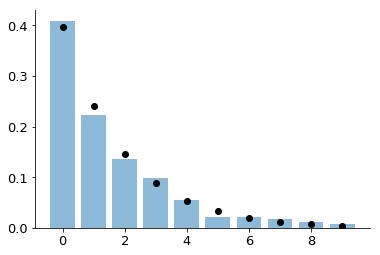

In [70]:
def solveLambdas(sample, outcomes, order=1):

    n_observations, n_dims = sample.shape
    n_lambdas = 0
    n_lambdas += n_dims if order > 0 else 0
    n_lambdas += n_dims*(n_dims+1)/2 if order > 1 else 0
    
    lambdas = np.zeros(n_lambdas)
    x = np.zeros([n_observations, n_lambdas])
    x[:, 0:n_dims] = sample
    if order > 1:
        idx = n_dims
        for i in range(n_dims):
            for j in range(i, n_dims):
                x[:, idx] = sample[:, i] * sample[:, j]
                idx += 1
                
    y_grid = np.meshgrid(*[outcomes for i in range(n_dims)], indexing='ij')
    y = np.vstack([y_tmp.ravel() for y_tmp in y_grid]).T
                
    constraints = x.mean(axis=0)
    

n_outcomes = 10
n_observations = 1000
mu = 2.

# The true distribution is an exponential distribution
x = np.arange(n_outcomes)
p_exp = 1/mu * np.exp(-x/mu)
p_exp /= p_exp.sum()

# Get a sample of n_observations from the true distribution
p_exp_cum = np.cumsum(p_exp)
r_sample = np.random.rand(n_observations)
sample = np.array([np.argmax(r < p_exp_cum) for r in r_sample])
sample = sample[:, np.newaxis]  # Turn into a matrix with one column
bin_edges = np.append(x-0.5, x.max() + 0.5)
# Calculate the empirical distribution
p_emp, _ = np.histogram(sample, bin_edges, density=True)

#solveLambdas(np.hstack([sample, sample]), x, 2)
solveLambdas(sample, x, 2)

plt.bar(x, p_emp, alpha=0.5)
plt.plot(x, p_exp, 'ko')

print np.dot(p_exp, x)

In [22]:
n = 4
print range(0,4)

[0, 1, 2, 3]


[ 5.42086536  8.05335415 -4.67038534]
[ 0.01186493 -0.04679609 -0.00264471]


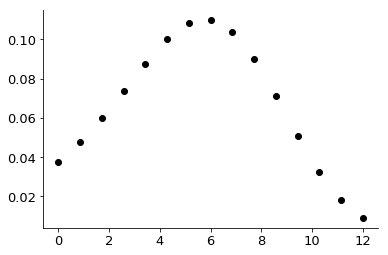

In [3]:

outcomes = np.linspace(0, 12, 15)
#constraints = np.array([2.44, 1.696, 1.116])
constraints = np.array([5.64, 8.01, -4.68])
lambdas = -1*np.zeros_like(constraints, dtype=np.float64)

q_raw = np.empty_like(outcomes)
for idx, val in enumerate(outcomes):
    q_raw[idx] = np.exp(lambdas[0]*val + lambdas[1]*(val-constraints[0])**2 + lambdas[2]*(val-constraints[0])**3)
# Normalize to get probabilitites
q = q_raw / q_raw.sum();

eta = 0.00002
for i in range(2500):
    q_raw = np.empty_like(outcomes)
    for idx, val in enumerate(outcomes):
        q_raw[idx] = np.exp(lambdas[0]*val + lambdas[1]*(val-constraints[0])**2 + lambdas[2]*(val-constraints[0])**3)
    # Normalize to get probabilitites
    q = q_raw / q_raw.sum()
    
    E_q = np.dot(q, np.vstack([outcomes, (outcomes-constraints[0])**2, (outcomes-constraints[0])**3]).T)
    
    lambdas_der = constraints - E_q
    lambdas += eta*lambdas_der
    
print E_q
print lambdas
plt.plot(outcomes, q, 'ko')